In [1]:
%cd ~/desktop/RNA/casp16

/Users/sumishunsuke/Desktop/RNA/casp16


/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# R1211のenergy計算

In [2]:
pdb_dir="./datasets/casp16/R1211/pdb"

!ls {pdb_dir}/*pdb | wc -l

# !python ./scripts/eval_scores.py --pdb_dir {pdb_dir} --out_dir {pdb_dir}

    1000


In [3]:
# proc un processed files
all_pdb_ids = [f"S_{str(i).zfill(6)}" for i in range(1, 1000+1)]


energies = {}
unprocessed = []
for pdb_id in all_pdb_ids:
    f = f"{pdb_dir}/{pdb_id}.briq.out"
    try:
        with open(f) as fh: lines = fh.readlines()
        energies[f] = float(lines[-1].strip().replace("Energy: ", ""))
    except:
        unprocessed.append(pdb_id)

print(len(energies), len(unprocessed))

921 79


In [6]:
unprocessed

['S_000058',
 'S_000059',
 'S_000064',
 'S_000065',
 'S_000067',
 'S_000070',
 'S_000071',
 'S_000073',
 'S_000101',
 'S_000107',
 'S_000113',
 'S_000115',
 'S_000129',
 'S_000148',
 'S_000160',
 'S_000174',
 'S_000259',
 'S_000265',
 'S_000266',
 'S_000271',
 'S_000298',
 'S_000299',
 'S_000302',
 'S_000303',
 'S_000305',
 'S_000311',
 'S_000316',
 'S_000317',
 'S_000339',
 'S_000410',
 'S_000458',
 'S_000459',
 'S_000463',
 'S_000464',
 'S_000465',
 'S_000470',
 'S_000471',
 'S_000477',
 'S_000488',
 'S_000500',
 'S_000501',
 'S_000503',
 'S_000514',
 'S_000517',
 'S_000606',
 'S_000612',
 'S_000649',
 'S_000661',
 'S_000667',
 'S_000673',
 'S_000675',
 'S_000698',
 'S_000699',
 'S_000701',
 'S_000702',
 'S_000703',
 'S_000716',
 'S_000717',
 'S_000729',
 'S_000809',
 'S_000821',
 'S_000835',
 'S_000840',
 'S_000841',
 'S_000846',
 'S_000852',
 'S_000854',
 'S_000855',
 'S_000868',
 'S_000883',
 'S_000885',
 'S_000891',
 'S_000897',
 'S_000918',
 'S_000919',
 'S_000924',
 'S_000925',

In [4]:
import sys
sys.path.append("./")
from src.score import RNA_BRiQ
from multiprocessing import Pool

with Pool(7) as pool:
    results = pool.map(
        RNA_BRiQ.process_pdb_file_eval,
        [f"{pdb_dir}/{pdb_id}.pdb" for pdb_id in unprocessed]
        )

In [5]:
results

[('S_000058', None),
 ('S_000059', None),
 ('S_000064', None),
 ('S_000065', None),
 ('S_000067', None),
 ('S_000070', None),
 ('S_000071', None),
 ('S_000073', None),
 ('S_000101', None),
 ('S_000107', None),
 ('S_000113', None),
 ('S_000115', None),
 ('S_000129', None),
 ('S_000148', None),
 ('S_000160', None),
 ('S_000174', None),
 ('S_000259', None),
 ('S_000265', None),
 ('S_000266', None),
 ('S_000271', None),
 ('S_000298', None),
 ('S_000299', None),
 ('S_000302', None),
 ('S_000303', None),
 ('S_000305', None),
 ('S_000311', None),
 ('S_000316', None),
 ('S_000317', None),
 ('S_000339', None),
 ('S_000410', None),
 ('S_000458', None),
 ('S_000459', None),
 ('S_000463', None),
 ('S_000464', None),
 ('S_000465', None),
 ('S_000470', None),
 ('S_000471', None),
 ('S_000477', None),
 ('S_000488', None),
 ('S_000500', None),
 ('S_000501', None),
 ('S_000503', None),
 ('S_000514', None),
 ('S_000517', None),
 ('S_000606', None),
 ('S_000612', None),
 ('S_000649', None),
 ('S_000661',

(394, 3)


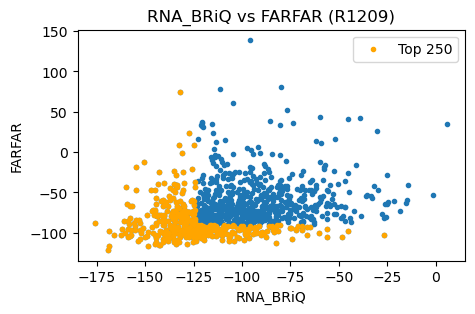

In [66]:
import pandas as pd
import os
import matplotlib.pyplot as plt

df_briq = pd.read_table(os.path.join(pdb_dir, "energies_RNABRiQ.txt"), sep=" ")
df_briq["pdb"] = df_briq["pdb"].apply(lambda x: x.split("/")[-1].replace(".pdb", ""))
df_briq.columns = ["pdb", "RNA_BRiQ"]
df_farfar = pd.read_csv(os.path.join(pdb_dir, "R1209_FARFAR2_scores.csv"))
df_farfar = df_farfar[["description", "score"]]
df_farfar.columns = ["pdb", "FARFAR"]

df = pd.merge(df_briq, df_farfar, on="pdb")

# take top100 from both scores
n_take = 250
df_briq_top = df.sort_values("RNA_BRiQ", ascending=True).head(n_take)
df_farfar_top = df.sort_values("FARFAR", ascending=True).head(n_take)
df_both_top = pd.concat([df_briq_top, df_farfar_top]).drop_duplicates()


plt.figure(figsize=(5,3))
plt.scatter(df["RNA_BRiQ"], df["FARFAR"], marker=".")
plt.scatter(df_both_top["RNA_BRiQ"], df_both_top["FARFAR"], marker=".", color="orange", label=f"Top {n_take}")
plt.legend()
plt.xlabel("RNA_BRiQ")
plt.ylabel("FARFAR")
plt.title("RNA_BRiQ vs FARFAR (R1209)")

print(df_both_top.shape)

In [62]:
# write pdb list to file
# df_both_top.to_csv(os.path.join(pdb_dir, f"top{n_take}_RNA_BRiQ_FARFAR.csv"), index=False)

In [67]:
df_both_top


,pdb,RNA_BRiQ,FARFAR
571,S_000777,-175.7360,-87.593
537,S_000158,-168.8970,-121.639
723,S_000203,-168.5830,-97.862
450,S_000220,-168.5090,-117.063
204,S_000651,-166.2150,-103.058
...,...,...,...
845,S_000299,-82.1214,-90.741
882,S_000887,-104.6220,-90.467
784,S_000265,-122.5570,-90.419
311,S_000742,-121.3250,-90.373


In [71]:
# cp selected pdb to new dir    
!mkdir -p ./datasets/casp16/R1209/pdb_selected
for pdb in df_both_top["pdb"]:
    !cp {pdb_dir}/{pdb}.pdb ./datasets/casp16/R1209/pdb_selected

# R1209の距離計算

In [68]:
pdb_dir="./datasets/casp16/R1209/pdb"
from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Superimposer
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [91]:
%cd ~/desktop/RNA/casp16
!time python scripts/calc_rmsd.py --pdb_dir datasets/casp16/R1209/pdb --cpu 8

/Users/sumishunsuke/Desktop/RNA/casp16
['S_000001.pdb', 'S_000002.pdb', 'S_000003.pdb', 'S_000004.pdb', 'S_000005.pdb']
Number of pdb files: 1000
Calculating RMSD matrix 1000x1000 using 8 cpus
Calculating RMSD for 0th pdb file
Calculating RMSD for 100th pdb file
Calculating RMSD for 50th pdb file


/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


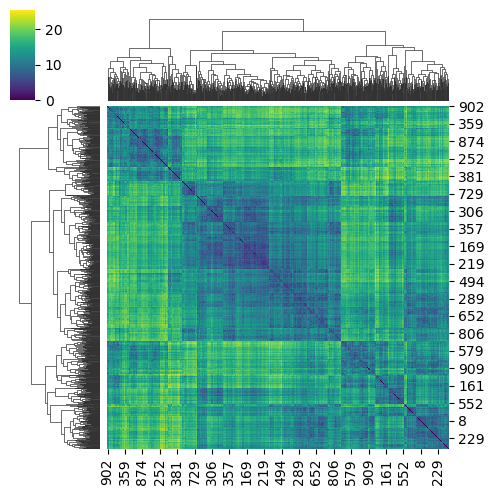

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rmsd = np.load("./datasets/casp16/R1209/pdb/rmsd_matrix.npy")
sns.clustermap(rmsd, cmap="viridis", figsize=(5,5))

In [9]:
# import matplotlib.pyplot as plt
# import numpy as np

# arr = np.load("./datasets/casp16/R1209/pdb/rmsd_matrix_sorted_id.npy")
# plt.imshow(arr, cmap="viridis")

# MDS, DBSCAN

In [23]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, n_jobs=7, max_iter=1000)
coords = mds.fit_transform(rmsd)

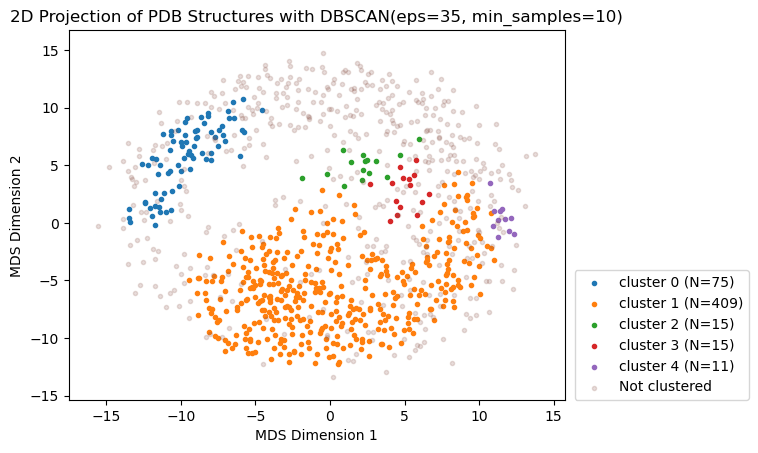

In [49]:
from sklearn.cluster import DBSCAN
eps = 35
min_samples = 10
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(rmsd)

plt.figure()
for c in set(clustering.labels_):
    if c == -1: 
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label="Not clustered", marker=".", alpha=0.2)
    else:
        n = sum(clustering.labels_ == c)
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label=f"cluster {c} (N={n})", marker=".")
plt.legend(loc = (1.02,0))
plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)

# plt.colorbar(label=label)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with DBSCAN(eps={eps}, min_samples={min_samples})')
plt.show()


In [99]:
briq_out_files = !ls {pdb_dir}/*out


energies_briq = {}
for f in briq_out_files:
    with open(f) as fh:
        lines = fh.readlines()
    pdb = f.replace(".briq.out", "").replace(".pdb", "").split("/")[-1]
    energies_briq[pdb] = float(lines[-1].strip().replace("Energy: ", ""))

energies_briq["S_000001"]

-112.222

In [105]:
def get_cluster_members(clustering, cluster_id):
    return [f"S_{str(i+1).zfill(6)}" for i in range(1000) if clustering.labels_[i] == cluster_id]

def get_cluster_energy(clustering, scores, cluster_id):
    members = get_cluster_members(clustering, cluster_id)
    tmp = {m:scores[m] for m in members} 
    # sort_values
    return dict(sorted(tmp.items(), key=lambda x:x[1]))
 
c = 1
e_farfar = get_cluster_energy(clustering, energies_farfar, c) # 1st: S_000416
e_briq = get_cluster_energy(clustering, energies_briq, c) # 1st: S_000197

e_farfar

{'S_000220': -117.063,
 'S_000468': -116.494,
 'S_000620': -115.461,
 'S_000873': -114.332,
 'S_000232': -113.73,
 'S_000974': -112.721,
 'S_000992': -112.207,
 'S_000664': -111.492,
 'S_000096': -111.049,
 'S_000782': -110.262,
 'S_000582': -109.782,
 'S_000870': -109.646,
 'S_000521': -109.564,
 'S_000453': -109.339,
 'S_000015': -107.317,
 'S_000395': -107.206,
 'S_000322': -106.899,
 'S_000346': -106.493,
 'S_000362': -106.482,
 'S_000763': -106.353,
 'S_000040': -106.174,
 'S_000793': -106.024,
 'S_000708': -105.506,
 'S_000170': -105.499,
 'S_000446': -105.14,
 'S_000286': -104.994,
 'S_000416': -104.697,
 'S_000897': -104.382,
 'S_000939': -104.249,
 'S_000879': -104.099,
 'S_000730': -103.914,
 'S_000622': -103.894,
 'S_000390': -103.8,
 'S_000417': -103.795,
 'S_000318': -103.539,
 'S_000651': -103.058,
 'S_000690': -102.833,
 'S_000834': -102.542,
 'S_000075': -102.5,
 'S_000586': -102.335,
 'S_000947': -102.248,
 'S_000404': -102.167,
 'S_000513': -101.754,
 'S_000257': -101

Text(0.5, 1.0, '2D Projection of PDB Structures with RNA-BRiQ Energy ')

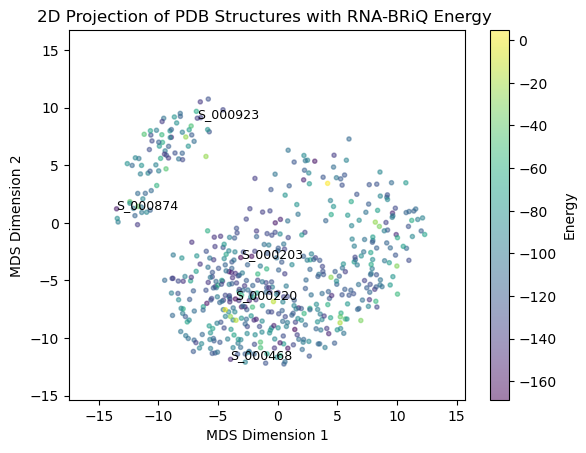

In [110]:
# embed with energy of cluster non-1
import os 

plt.figure()
idx_non_minus1 = np.where(clustering.labels_ != -1)[0]
plt.scatter(coords[idx_non_minus1, 0], coords[idx_non_minus1, 1], 
            c=[energies[f"S_{str(i+1).zfill(6)}"] for i in idx_non_minus1],
            marker=".", cmap="viridis", alpha=0.5
            )

for i in range(1000):
    pdb = f"S_{str(i+1).zfill(6)}"
    if pdb in ["S_000874", "S_000923", "S_000203", "S_000220", "S_000468"]:
        plt.text(coords[i, 0], coords[i, 1], pdb, fontsize=9)



plt.colorbar(label="Energy")

plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with RNA-BRiQ Energy ')

In [93]:
import pandas as pd 
df_farfar = pd.read_csv("datasets/casp16/R1209/pdb/R1209_FARFAR2_scores.csv")
df_farfar = df_farfar[["description", "score"]]
# print(df_farfar.head(2))

energies_farfar = {}
for i, f in df_farfar.iterrows():
    energies_farfar[str(f["description"])] = float(f["score"])

energies_farfar["S_000002"]

-96.071

In [92]:
idx_non_minus1[:4]

array([1, 2, 4, 6])

Text(0.5, 1.0, '2D Projection of PDB Structures with FARFAR Energy ')

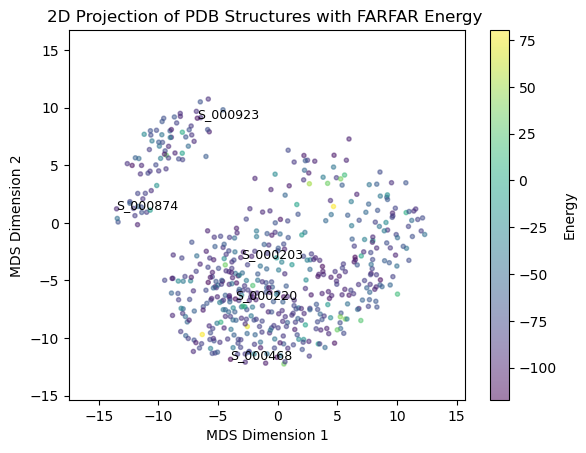

In [112]:

# embed with energy of cluster non-1


import os 

plt.figure()
idx_non_minus1 = np.where(clustering.labels_ != -1)[0]
plt.scatter(coords[idx_non_minus1, 0], coords[idx_non_minus1, 1], 
            c=[energies_farfar[f"S_{str(i+1).zfill(6)}"] for i in idx_non_minus1],
            marker=".", cmap="viridis", alpha=0.5
            )
for i in range(1000):
    pdb = f"S_{str(i+1).zfill(6)}"
    if pdb in ["S_000874", "S_000923", "S_000203", "S_000220", "S_000468"]:
        plt.text(coords[i, 0], coords[i, 1], pdb, fontsize=9)

plt.colorbar(label="Energy")

plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with FARFAR Energy ')

NameError: name 'pdb_files' is not defined

{'S_000220': -117.063,
 'S_000468': -116.494,
 'S_000620': -115.461,
 'S_000873': -114.332,
 'S_000232': -113.73,
 'S_000974': -112.721,
 'S_000992': -112.207,
 'S_000664': -111.492,
 'S_000096': -111.049,
 'S_000782': -110.262,
 'S_000582': -109.782,
 'S_000870': -109.646,
 'S_000521': -109.564,
 'S_000453': -109.339,
 'S_000015': -107.317,
 'S_000395': -107.206,
 'S_000322': -106.899,
 'S_000346': -106.493,
 'S_000362': -106.482,
 'S_000763': -106.353,
 'S_000040': -106.174,
 'S_000793': -106.024,
 'S_000708': -105.506,
 'S_000170': -105.499,
 'S_000446': -105.14,
 'S_000286': -104.994,
 'S_000416': -104.697,
 'S_000897': -104.382,
 'S_000939': -104.249,
 'S_000879': -104.099,
 'S_000730': -103.914,
 'S_000622': -103.894,
 'S_000390': -103.8,
 'S_000417': -103.795,
 'S_000318': -103.539,
 'S_000651': -103.058,
 'S_000690': -102.833,
 'S_000834': -102.542,
 'S_000075': -102.5,
 'S_000586': -102.335,
 'S_000947': -102.248,
 'S_000404': -102.167,
 'S_000513': -101.754,
 'S_000257': -101